In [1]:
import sys
# Add the src directory to the Python path
sys.path.insert(0, '../src')

In [2]:
from datetime import datetime

import numpy as np

from botcoin.profilers.stock import StockProfiler
from botcoin.utils.stream_data import generate_price_stream
from botcoin.utils.visual.statistics import plot_kde_with_stats, plot_price_histogram_with_stats, plot_fourier_results

In [3]:
symbol = "AAPL"
profiler = StockProfiler()

In [4]:
profile = profiler.profile(symbol)

2025-06-30 23:55:37,892 - YfDataProvider - WARNING: The date range does not contain any market open times.
2025-06-30 23:55:37,896 - DataManager - INFO: Data saved to data\AAPL_ohlcv_1d.parquet
c:\Users\runfei\projects\Botcoin\notebooks\../src\botcoin\profilers\stock.py:203: FutureWarning: YF.download() has changed argument auto_adjust default to True
  irx = yf.download("^IRX", start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed
2025-06-30 23:55:38,250 - YfDataProvider - WARNING: The date range does not contain any market open times.
2025-06-30 23:55:38,253 - DataManager - INFO: Data saved to data\AAPL_ohlcv_1d.parquet
2025-06-30 23:55:38,989 - YfDataProvider - WARNING: The date range does not contain any market open times.
2025-06-30 23:55:38,993 - DataManager - INFO: Data saved to data\SPY_ohlcv_1d.parquet


In [5]:
profiler.print_profile(profile)

Symbol: AAPL
IPO Date: 1980-12-12
Quote: 205.17
Annual Return: 18.88%
Sharpe Ratio: 1.12
Sortino Ratio: 1.01
Beta: 1.29


In [6]:
returns_1min = profile["1min_returns"]
print(f"Profile for {symbol}:")
print(f"Number of 1-minute returns for {symbol}: {len(returns_1min)}")
print(f"Mean 1-minute returns for {symbol}: {returns_1min.mean():.6f}")
print(f"Standard deviation of 1-minute returns for {symbol}: {returns_1min.std():.6f}")
print(f"Max 1-minute return for {symbol}: {returns_1min.max():.6f}")
print(f"Min 1-minute return for {symbol}: {returns_1min.min():.6f}")

Profile for AAPL:
Number of 1-minute returns for AAPL: 7692
Mean 1-minute returns for AAPL: -0.000005
Standard deviation of 1-minute returns for AAPL: 0.000623
Max 1-minute return for AAPL: 0.007205
Min 1-minute return for AAPL: -0.007726


In [7]:
returns_1d = profile["1d_returns"]
print(f"Number of 1-day returns for {symbol}: {len(returns_1d)}")
print(f"Mean 1-day returns for {symbol}: {returns_1d.mean():.6f}")
print(f"Standard deviation of 1-day returns for {symbol}: {returns_1d.std():.6f}")
print(f"Max 1-day return for {symbol}: {returns_1d.max():.6f}")
print(f"Min 1-day return for {symbol}: {returns_1d.min():.6f}")

Number of 1-day returns for AAPL: 1269
Mean 1-day returns for AAPL: 0.000933
Standard deviation of 1-day returns for AAPL: 0.015624
Max 1-day return for AAPL: 0.156441
Min 1-day return for AAPL: -0.076486


In [8]:
# Compute percentage of data within ±1 std
data = returns_1d
mean = data.mean()
std = data.std()
lower_bound = mean - std
upper_bound = mean + std
within_std = data[(data >= lower_bound) & (data <= upper_bound)]
percentage_within_std = len(within_std) / len(data) * 100

print(f"Percentage of 1-day returns within ±1 std for {symbol}: {percentage_within_std:.2f}%")

Percentage of 1-day returns within ±1 std for AAPL: 75.41%


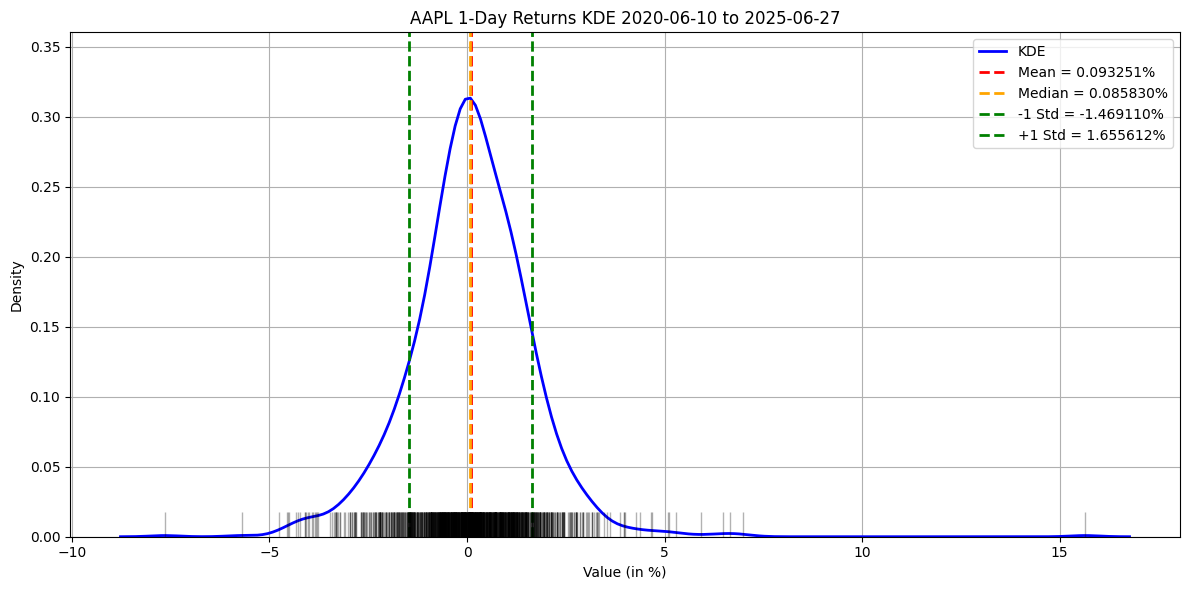

In [9]:
# Compute the date range of the 1-day returns
start_date = data.index.min().date()
end_date = data.index.max().date()

plot_kde_with_stats(returns_1d, title=f"{symbol} 1-Day Returns KDE {start_date} to {end_date}")


In [10]:
ohlcv = profile['ohlcv_1min']

prices = generate_price_stream(ohlcv, candle_duration='1min', avg_freq_per_minute=10)

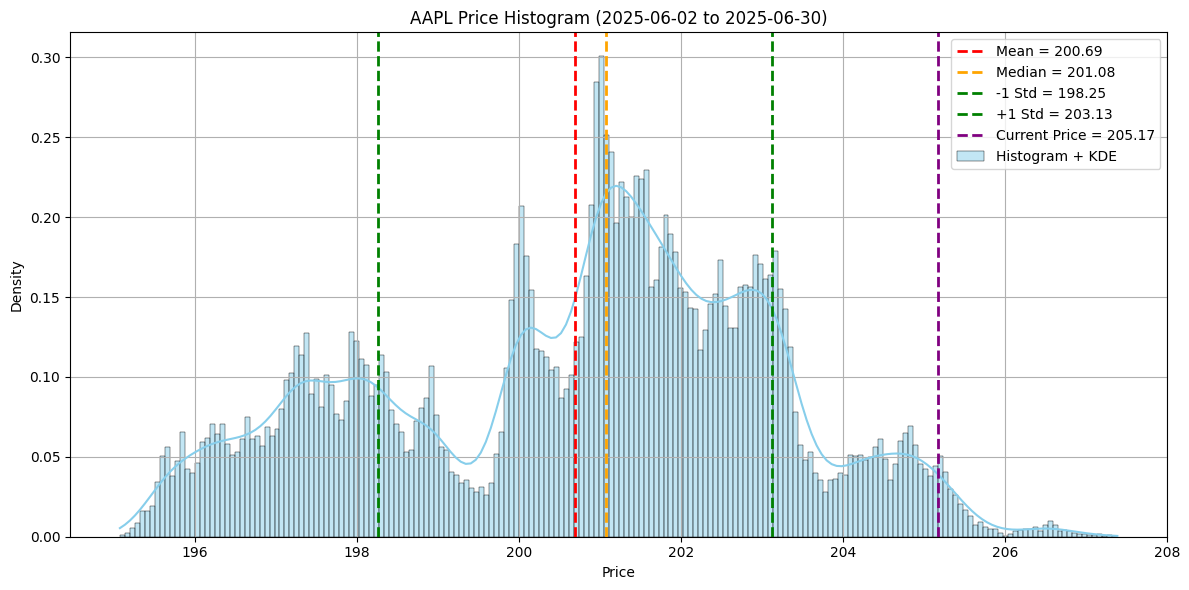

In [11]:
start_time = prices.index.min()
end_time = prices.index.max()

# convert Unix timestamps to datetime objects
start_date = datetime.fromtimestamp(start_time).date()
end_date = datetime.fromtimestamp(end_time).date()

current_price = profile['quote']

plot_price_histogram_with_stats(prices['price'], current_price=current_price, title=f"{symbol} Price Histogram ({start_date} to {end_date})", bins=200)

## Fourier analysis for stock price series.

### Market Cycle Analysis
Traders use Fourier analysis to decompose price movements into component frequencies, helping identify dominant market cycles and seasonal patterns that traditional time-series analysis might miss.

### Limitations
However, research examining the technique has found little to no evidence that it is useful in practice Fourier Analysis: What it Means, How it Works for stock trading specifically. The effectiveness varies significantly depending on the application and market conditions.
The mathematical foundation allows traders to transform time-domain price data into frequency domain, revealing periodic components and enabling more sophisticated analysis of market behavior.

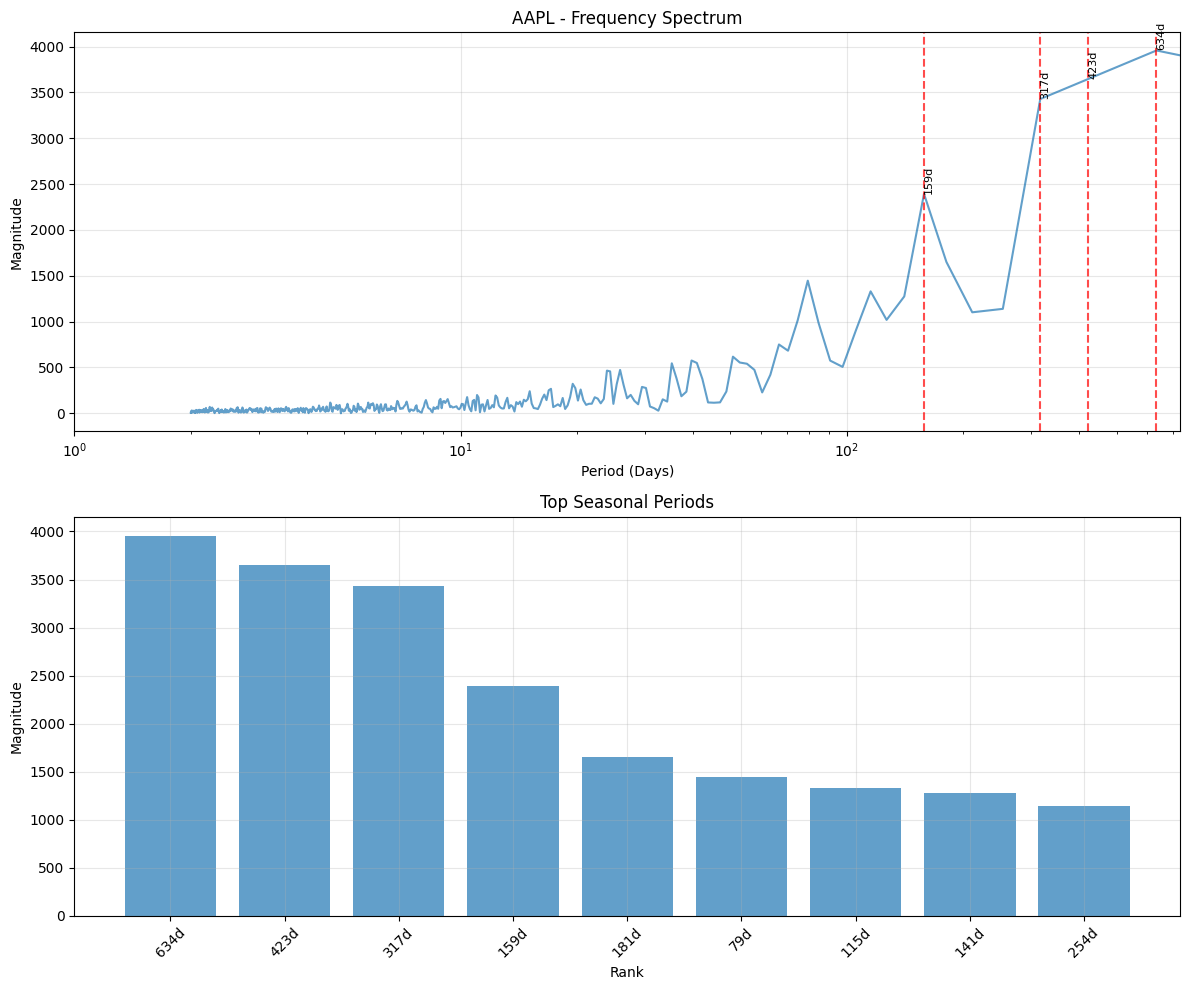

In [ ]:
returns_1d = profile['df_1d']['Close'].values
fourier_results = profiler.fourier_analysis(returns_1d)

periods = fourier_results['periods']
magnitudes = fourier_results['magnitudes']
frequencies = fourier_results['frequencies']

# compute dominant periods and magnitudes
TOP_N = 10  # Number of top periods to display
dominant_indices = np.argsort(magnitudes)[-10:][::-1]  # Top 10
dominant_periods = periods[dominant_indices]
dominant_magnitudes = magnitudes[dominant_indices]

# plot the Fourier analysis results
plot_fourier_results(
    symbol=symbol,
    periods=periods,
    magnitudes=magnitudes,
    dominant_periods=dominant_periods,
    dominant_magnitudes=dominant_magnitudes,
)